# ⚠️ Informações da Avaliação

**Aluna:** Natalia Brito da Silva

**Nome da Tarefa:** Primeira avaliação da Nota 2

**Descrição:** Considere as instruções presentes no documento anexo.

*Como entregável, envie o link do notebook (Google Colaboratory). Não esqueça de compartilhá-lo para qualquer pessoa com o link.*

**Link do dataset no ICS, caso a dupla queira colocá-lo em seu próprio GitHub:** https://archive.ics.uci.edu/dataset/162/forest+fires

**Link do dataset no GitHub do professor, incluindo o documento de nomes dos atributos:** https://github.com/prof-jpontes/2024_Estatistica/tree/main/Datasets/fires

**Link para a importação direta do dataset no GitHub do professor:** (https://raw.githubusercontent.com/prof-jpontes/2024_Estatistica/main/Datasets/fires/forestfires.csv)

# Exercício 1 - Distribuições de frequência

**Especificação:** Execute os passos para a geração de uma tabela resumo da distribuição de frequência de cada um dos cinco atributos (Dia, Mês, DMC, DC e ISI). As colunas de cada tabela serão somente: classe, limite inferior, ponto médio, limite superior, frequência absoluta, frequência relativa, frequência acumulada (valor) e frequência acumulada (percentual).

---

**Entregável:** implemente um programa que imprima a tabela resumo da distribuição de frequência para cada um dos cinco atributos. Inclua todos os cálculos necessários no programa. Assuma que a quantidade de classes é uma constante ou variável.

---

**Observações:**

*   Para atributos categóricos, não há necessidade de executar todos os passos na construção da distribuição de frequência, sendo que a quantidade de categorias pode ser utilizada como número de classes, bastando determinar a frequência de cada categoria do atributo.

*   Qualquer dúvida veja as Tabelas 3.4, 3.6 e 3.7 do livro texto;

*   Note que as Tabelas 3.6 e 3.7 apresentam os resumos das distribuições de frequência dos atributos DMC e DC, respectivamente;

*   Observe que não é necessário incluir a coluna "Fronteiras".

##Tabela de distribuição de frequências dos 5 atributos


In [1]:
import numpy as np
import pandas as pd

In [2]:
# Carrega a base de dados a partir do link
url = 'https://raw.githubusercontent.com/prof-jpontes/2024_Estatistica/main/Datasets/fires/forestfires.csv'
df = pd.read_csv(url)
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [3]:
def frequency_distribution(data, attribute, num_classes):
  if data[attribute].dtype == 'object':  # Atributos Categóricos
    frequency = data[attribute].value_counts().sort_index()
    relative_frequency = frequency / frequency.sum()
    cumulative_frequency = relative_frequency.cumsum()

    table = pd.DataFrame({
        'Classe': frequency.index,
        'Frequência Absoluta': frequency.values,
        'Frequência Relativa': relative_frequency.values,
        'Frequência Acumulada (Valor)': cumulative_frequency.values,
        'Frequência Acumulada (Percentual)': (cumulative_frequency * 100).values
    })

  else:  # Atributos Numéricos
    min_value = data[attribute].min()
    max_value = data[attribute].max()
    class_width = (max_value - min_value) / num_classes

    bins = [min_value + i * class_width for i in range(num_classes + 1)]
    frequency, _ = np.histogram(data[attribute], bins=bins)

    lower_limits = bins[:-1]
    upper_limits = bins[1:]

    # Calcula o ponto médio de cada classe
    midpoints = (np.array(lower_limits) + np.array(upper_limits)) / 2

    relative_frequency = frequency / frequency.sum()
    cumulative_frequency = relative_frequency.cumsum()

    table = pd.DataFrame({
        'Classe': range(1, num_classes + 1),
        'Limite Inferior': lower_limits,
        'Ponto Médio': midpoints,
        'Limite Superior': upper_limits,
        'Frequência Absoluta': frequency,
        'Frequência Relativa': relative_frequency,
        'Frequência Acumulada (Valor)': cumulative_frequency,
        'Frequência Acumulada (Percentual)': (cumulative_frequency * 100)
    })

  return table

# Número de classes desejado
num_classes = 5
attributes = ['day', 'month', 'DMC', 'DC', 'ISI']  # Lista de atributos

for attribute in attributes:  # Loop para cada atributo
  table = frequency_distribution(df, attribute, num_classes)  # Cria a tabela de distribuição de frequência
  print(f"Tabela de Distribução de Frequência - {attribute.upper()}:")  # Imprime o título da tabela
  print(table)  # Imprime a tabela
  print("\n")  # Pula uma linha para separar as tabelas
  print("-" * 100)  # Linha divisória

Tabela de Distribução de Frequência - DAY:
  Classe  Frequência Absoluta  Frequência Relativa  \
0    fri                   85             0.164410   
1    mon                   74             0.143133   
2    sat                   84             0.162476   
3    sun                   95             0.183752   
4    thu                   61             0.117988   
5    tue                   64             0.123791   
6    wed                   54             0.104449   

   Frequência Acumulada (Valor)  Frequência Acumulada (Percentual)  
0                      0.164410                          16.441006  
1                      0.307544                          30.754352  
2                      0.470019                          47.001934  
3                      0.653772                          65.377176  
4                      0.771760                          77.176015  
5                      0.895551                          89.555126  
6                      1.000000          

# Exercício 2 - Visualização de dados

**Especificação:** Para cada um dos cinco atributos (Dia, Mês, DMC, DC e ISI), gere os seguintes gráficos:


1.   histogramas das frequências relativas e absolutas;
2.   gráfico de polígonos;
3.   gráfico de setores;
4.   gráfico de Pareto;
5.   gráfico de dispersão entre cada dois atributos, ou seja, DMC x Dia, DMC x Mês, DMC x DC, DMC x ISI, DC x Dia, DC x Mês, DC x ISI, ISI x Dia, ISI x Mês, Dia x Mês.

---

Além dos gráficos, inclua comentários sobre as informações obtidas pelas análises dos gráficos, deixando claro o gráfico e a informação obtida.

---

**Entregável:** implemente um programa que, baseado nos dados, plote os gráficos definidos acima. Os comentários sobre as informações obtidas pelas análises dos gráficos devem ser enviados em um arquivo PDF à parte.

##Histogramas

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

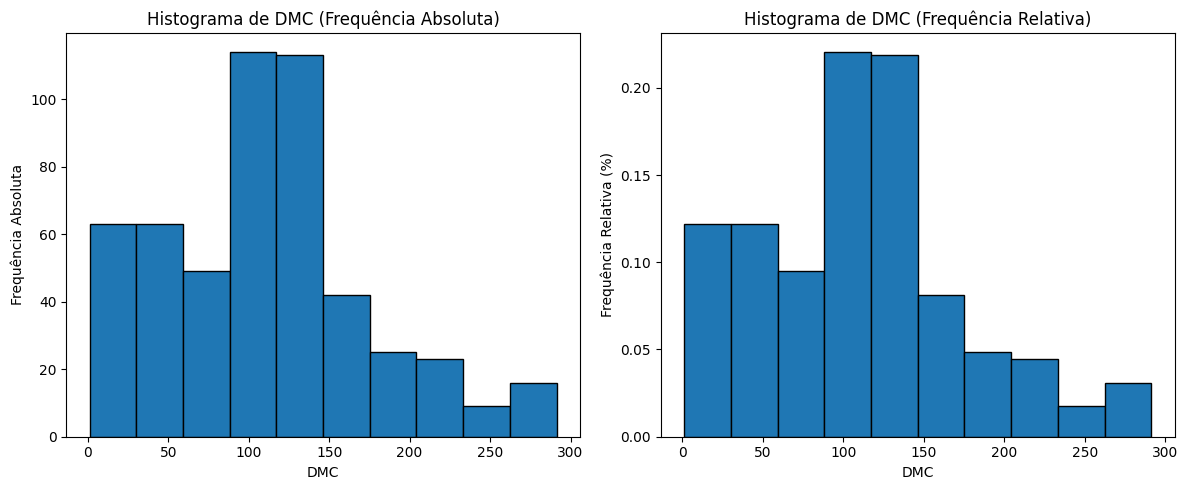

In [5]:
# DMC
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['DMC'], bins=10, edgecolor='black')
plt.xlabel('DMC')
plt.ylabel('Frequência Absoluta')
plt.title('Histograma de DMC (Frequência Absoluta)')

plt.subplot(1, 2, 2)
plt.hist(df['DMC'], bins=10, edgecolor='black', weights=np.ones_like(df['DMC']) / len(df['DMC']))
plt.xlabel('DMC')
plt.ylabel('Frequência Relativa (%)')
plt.title('Histograma de DMC (Frequência Relativa)')

plt.tight_layout()
plt.show()

# O gráfico mostra dois histogramas lado a lado para a variável DMC:
# Frequência Absoluta: Mostra a contagem de incêndios em cada intervalo de DMC.
# Frequência Relativa: Mostra a proporção de incêndios em cada intervalo em relação ao total.

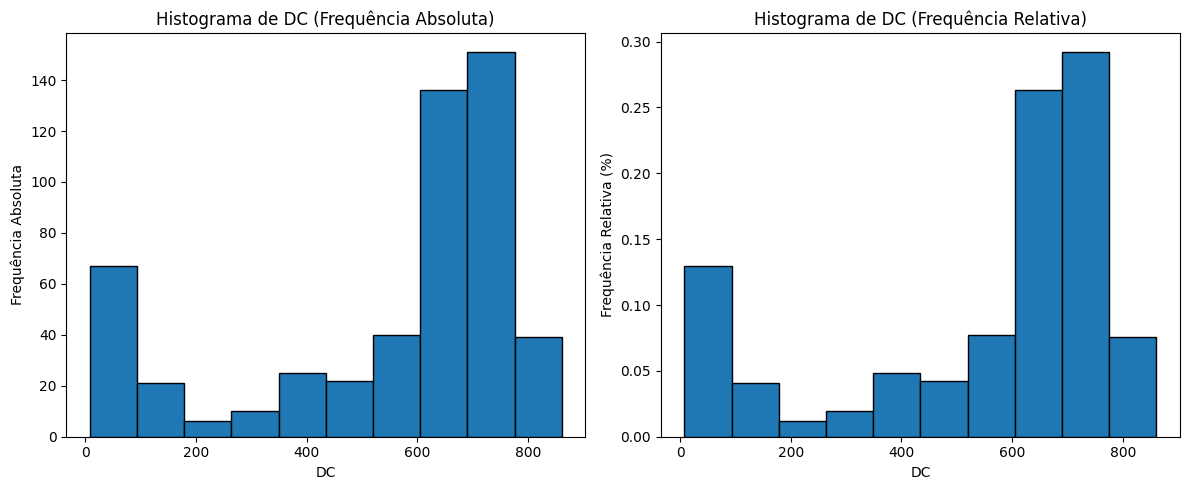

In [6]:
# DC
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['DC'], bins=10, edgecolor='black')
plt.xlabel('DC')
plt.ylabel('Frequência Absoluta')
plt.title('Histograma de DC (Frequência Absoluta)')

plt.subplot(1, 2, 2)
plt.hist(df['DC'], bins=10, edgecolor='black', weights=np.ones_like(df['DC']) / len(df['DC']))
plt.xlabel('DC')
plt.ylabel('Frequência Relativa (%)')
plt.title('Histograma de DC (Frequência Relativa)')

plt.tight_layout()
plt.show()

# O gráfico mostra dois histogramas lado a lado para a variável DC:
# Frequência Absoluta: Mostra a contagem de incêndios em cada intervalo de DC.
# Frequência Relativa: Mostra a proporção de incêndios em cada intervalo em relação ao total.

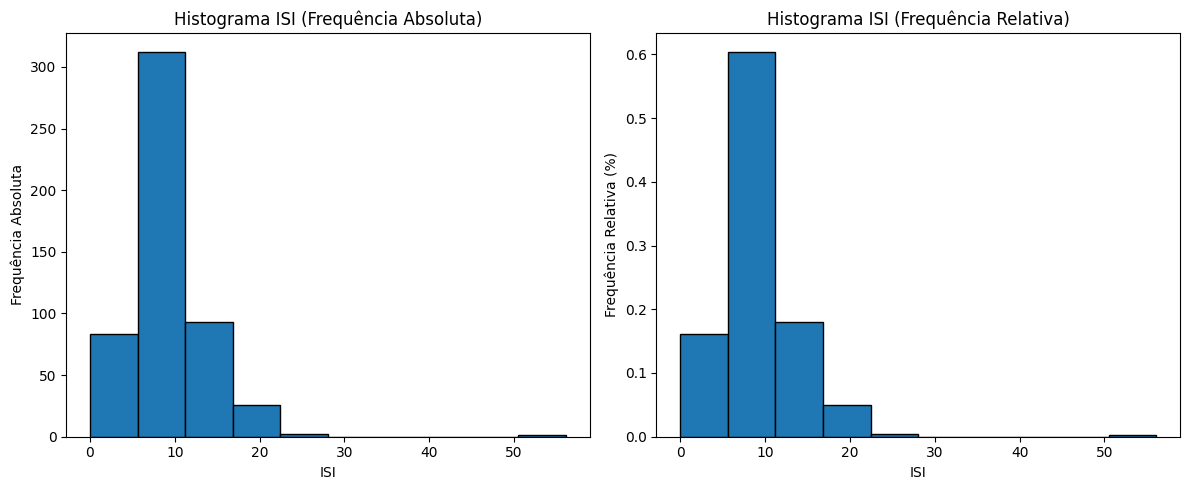

In [7]:
# ISI
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['ISI'], bins=10, edgecolor='black')
plt.xlabel('ISI')
plt.ylabel('Frequência Absoluta')
plt.title('Histograma ISI (Frequência Absoluta)')

plt.subplot(1, 2, 2)
plt.hist(df['ISI'], bins=10, edgecolor='black', weights=np.ones_like(df['ISI']) / len(df['ISI']))
plt.xlabel('ISI')
plt.ylabel('Frequência Relativa (%)')
plt.title('Histograma ISI (Frequência Relativa)')

plt.tight_layout()
plt.show()

# O gráfico mostra dois histogramas lado a lado para a variável ISI:
# Frequência Absoluta: Mostra a contagem de incêndios em cada intervalo de ISI.
# Frequência Relativa: Mostra a proporção de incêndios em cada intervalo em relação ao total.

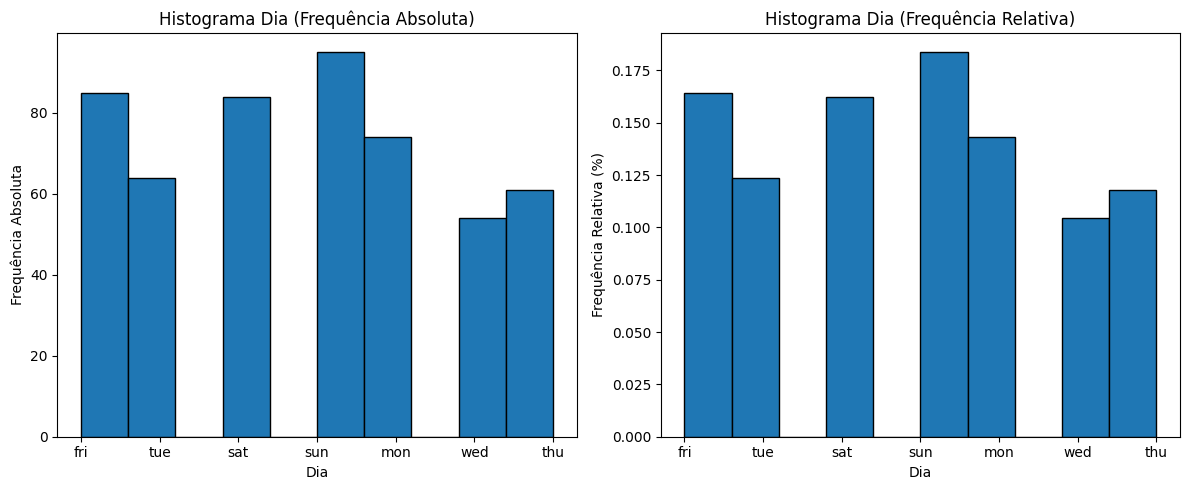

In [8]:
# day
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['day'], bins=10, edgecolor='black')
plt.xlabel('Dia')
plt.ylabel('Frequência Absoluta')
plt.title('Histograma Dia (Frequência Absoluta)')

plt.subplot(1, 2, 2)
plt.hist(df['day'], bins=10, edgecolor='black', weights=np.ones_like(df['day']) / len(df['day']))
plt.xlabel('Dia')
plt.ylabel('Frequência Relativa (%)')
plt.title('Histograma Dia (Frequência Relativa)')

plt.tight_layout()
plt.show()

# O gráfico mostra dois histogramas lado a lado para a variável day/dia:
# Frequência Absoluta: Mostra a contagem de incêndios em cada intervalo de dias.
# Frequência Relativa: Mostra a proporção de incêndios em cada intervalo em relação ao total.

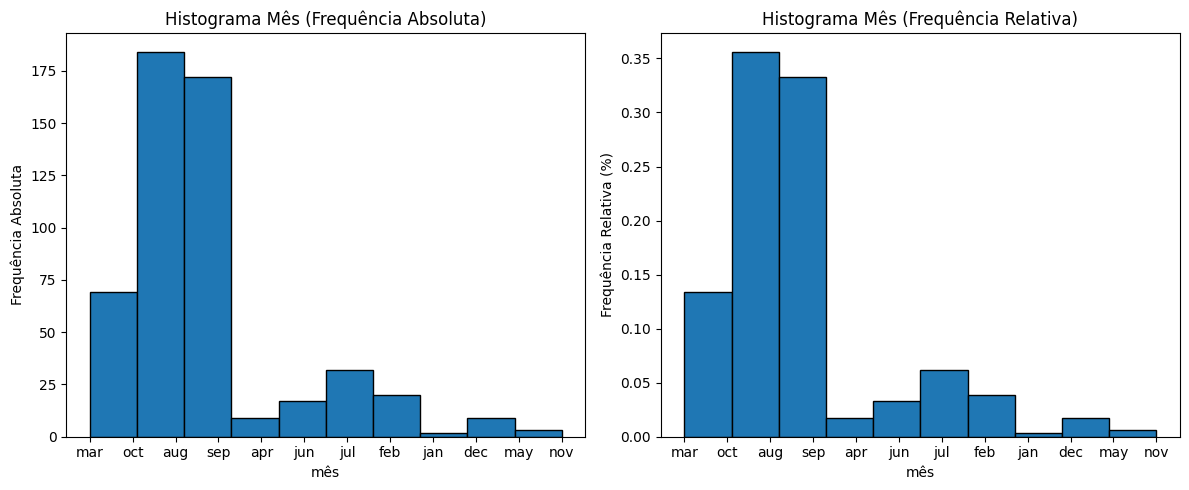

In [9]:
# month
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['month'], bins=10, edgecolor='black')
plt.xlabel('mês')
plt.ylabel('Frequência Absoluta')
plt.title('Histograma Mês (Frequência Absoluta)')

plt.subplot(1, 2, 2)
plt.hist(df['month'], bins=10, edgecolor='black', weights=np.ones_like(df['month']) / len(df['month']))
plt.xlabel('mês')
plt.ylabel('Frequência Relativa (%)')
plt.title('Histograma Mês (Frequência Relativa)')

plt.tight_layout()
plt.show()

# O gráfico mostra dois histogramas lado a lado para a variável month:
# Frequência Absoluta: Mostra a contagem de incêndios em cada intervalo de month.
# Frequência Relativa: Mostra a proporção de incêndios em cada intervalo em relação ao total.

##Gráficos de Polígonos


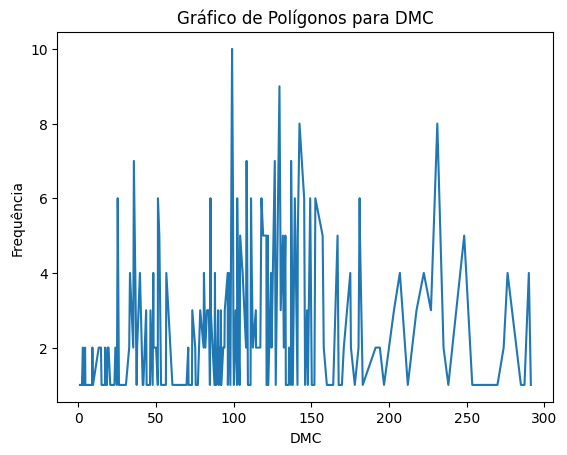

In [10]:
# DMC
plt.figure()
df['DMC'].value_counts().sort_index().plot(kind='line')
plt.xlabel('DMC')
plt.ylabel('Frequência')
plt.title('Gráfico de Polígonos para DMC')
plt.show()

# O gráfico de polígonos mostra a frequência de incêndios em cada valor de DMC.
# Ele ajuda a visualizar como o número de incêndios varia e identifica padrões sazonais.

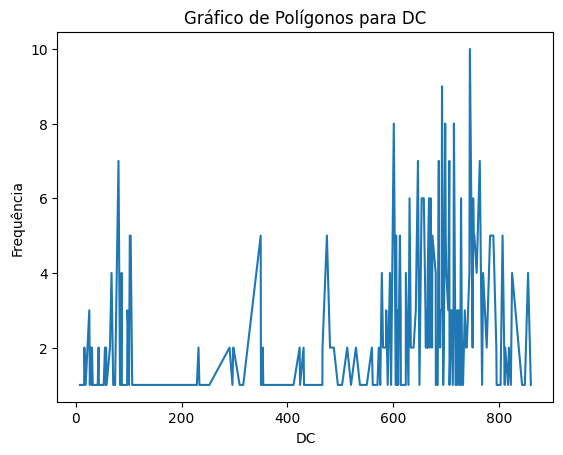

In [11]:
# DC
plt.figure()
df['DC'].value_counts().sort_index().plot(kind='line')
plt.xlabel('DC')
plt.ylabel('Frequência')
plt.title('Gráfico de Polígonos para DC')
plt.show()

# O gráfico de polígonos mostra a frequência de incêndios em cada valor de DC.
# Ele ajuda a visualizar como o número de incêndios varia e identifica padrões sazonais.

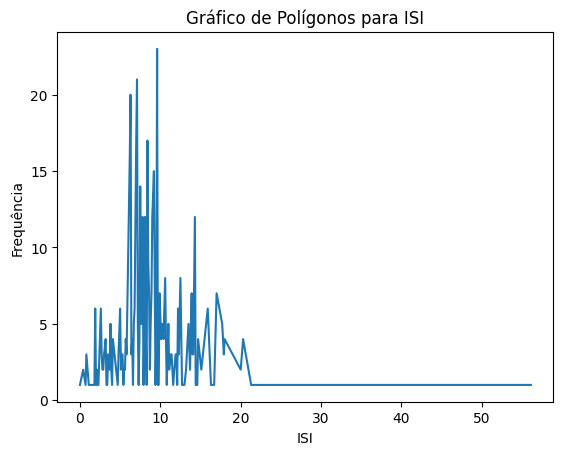

In [12]:
# ISI
plt.figure()
df['ISI'].value_counts().sort_index().plot(kind='line')
plt.xlabel('ISI')
plt.ylabel('Frequência')
plt.title('Gráfico de Polígonos para ISI')
plt.show()

# O gráfico de polígonos mostra a frequência de incêndios em cada valor de ISI.
# Ele ajuda a visualizar como o número de incêndios varia e identifica padrões sazonais.

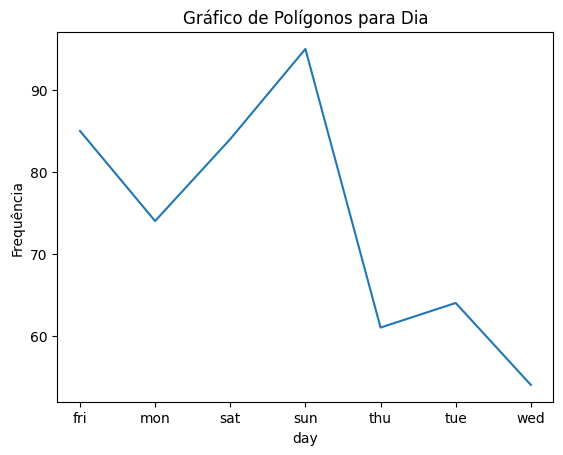

In [13]:
# day
plt.figure()
df['day'].value_counts().sort_index().plot(kind='line')
plt.xlabel('day')
plt.ylabel('Frequência')
plt.title('Gráfico de Polígonos para Dia')
plt.show()

# O gráfico de polígonos mostra a frequência de incêndios em cada dia da semana.
# Ele ajuda a visualizar como o número de incêndios varia e identifica padrões sazonais.

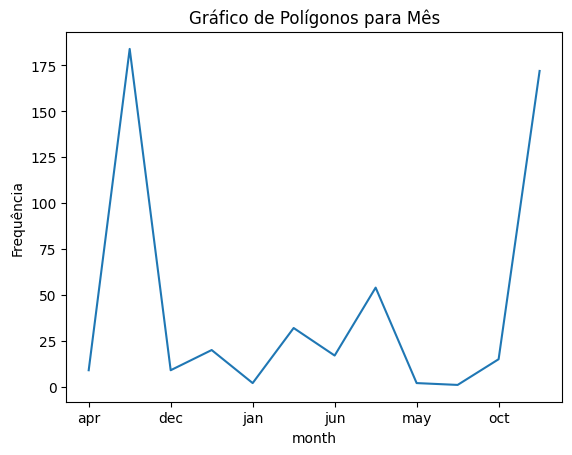

In [14]:
# month
plt.figure()
df['month'].value_counts().sort_index().plot(kind='line')
plt.xlabel('month')
plt.ylabel('Frequência')
plt.title('Gráfico de Polígonos para Mês')
plt.show()

# O gráfico de polígonos mostra a frequência de incêndios em cada mês ao longo do ano.
# Ele ajuda a visualizar como o número de incêndios varia e identifica padrões sazonais.

---

##Gráficos de Setores

---


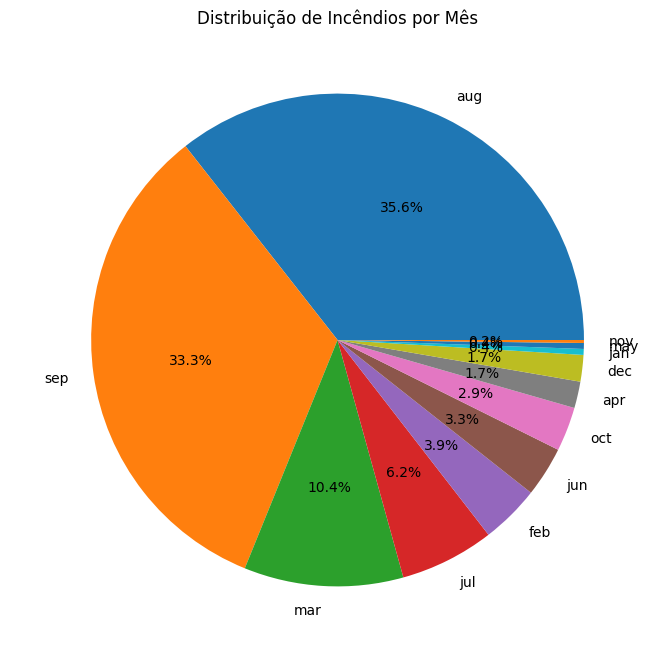

In [15]:
# month
plt.figure(figsize=(8, 8))
df['month'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel(' ')
plt.title('Distribuição de Incêndios por Mês')
plt.show()

# O gráfico de pizza mostra a distribuição dos incêndios ao longo dos meses do ano.
# Ele ajuda a visualizar quais meses têm mais incêndios e a proporção de cada mês em relação ao total.

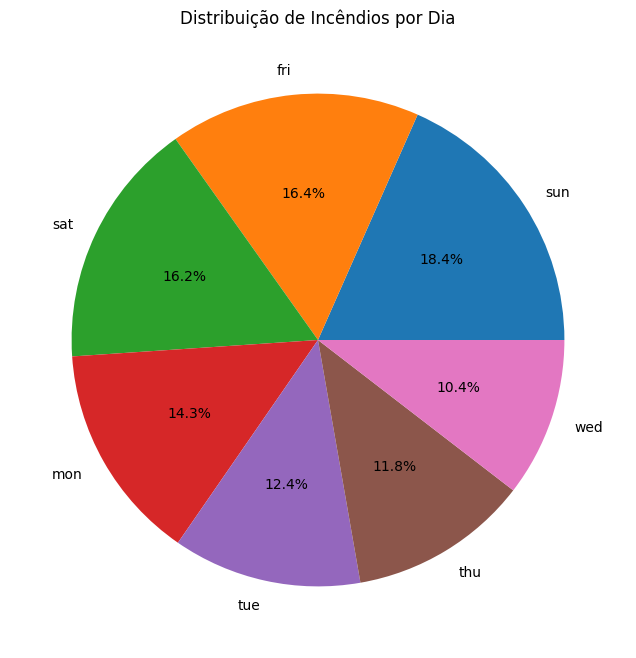

In [16]:
# day
plt.figure(figsize=(8, 8))
df['day'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Distribuição de Incêndios por Dia')
plt.show()

# O gráfico de pizza mostra a distribuição dos incêndios ao longo dos dias da semana.
# Ele ajuda a visualizar quais dias têm mais incêndios e a proporção de cada dia em relação ao total.

##Gráficos de Pareto

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0
Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')


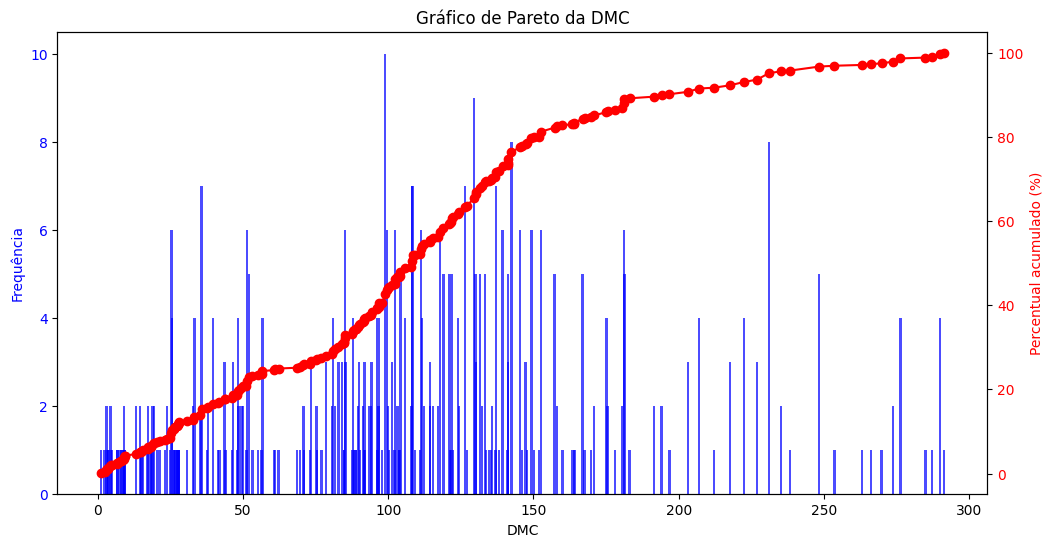

In [17]:
# DMC
import pandas as pd
import matplotlib.pyplot as plt

# Carregar a base de dados a partir do link
url = 'https://raw.githubusercontent.com/prof-jpontes/2024_Estatistica/main/Datasets/fires/forestfires.csv'
df = pd.read_csv(url)

# Visualizar as primeiras linhas para entender a estrutura dos dados
print(df.head())

# Verificar os nomes das colunas
print(df.columns)

# Contar a frequência de cada valor DMC
dmc_counts = df['DMC'].value_counts().sort_index()

# Calcular a frequência acumulada
dmc_counts_cum = dmc_counts.cumsum()

# Calcular o total de entradas
total = dmc_counts.sum()

# Calcular a porcentagem acumulada
dmc_percentage_cum = dmc_counts_cum / total * 100

# Criar o gráfico de Pareto
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de barras para frequências
ax1.bar(dmc_counts.index, dmc_counts, color='b', alpha=0.7)
ax1.set_xlabel('DMC')
ax1.set_ylabel('Frequência', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Gráfico de linha para porcentagem acumulada
ax2 = ax1.twinx()
ax2.plot(dmc_percentage_cum.index, dmc_percentage_cum, color='r', marker='o')
ax2.set_ylabel('Percentual acumulado (%)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Gráfico de Pareto da DMC')
plt.show()

# O gráfico de Pareto DMC mostra a distribuição do índice de seca `DMC` e a porcentagem acumulada desses índices.

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0
Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')


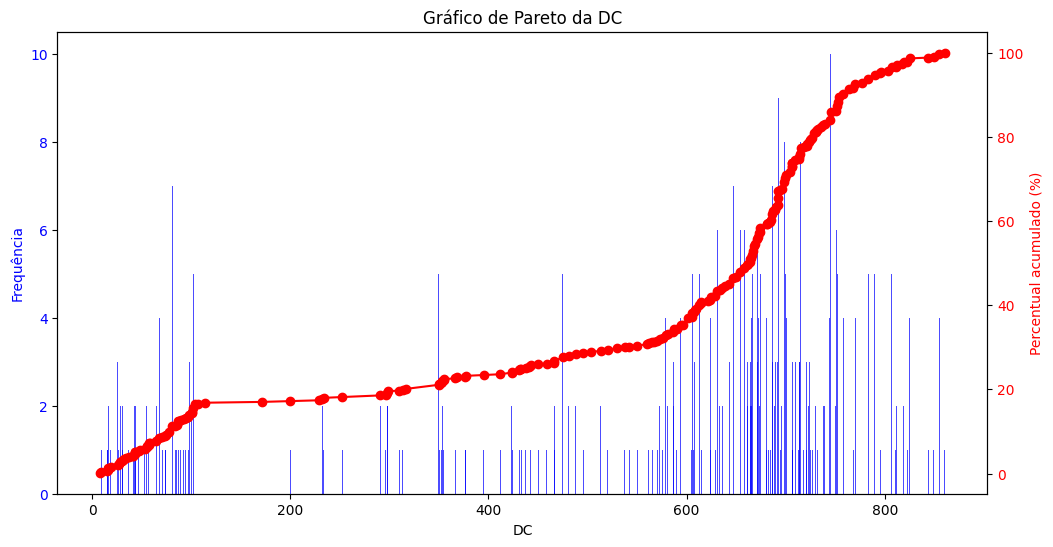

In [18]:
# DC
import pandas as pd
import matplotlib.pyplot as plt

# Carrega a base de dados a partir do link
url = 'https://raw.githubusercontent.com/prof-jpontes/2024_Estatistica/main/Datasets/fires/forestfires.csv'
df = pd.read_csv(url)

# Visualiza as primeiras linhas e colunas para entender a estrutura
print(df.head())
print(df.columns)

# Conta a frequência dos valores em 'DC'
dc_counts = df['DC'].value_counts().sort_index()

# Calcula a frequência acumulada e percentual acumulado
dc_counts_cum = dc_counts.cumsum()
total_dc = dc_counts.sum()
dc_percentage_cum = dc_counts_cum / total_dc * 100

# Cria o gráfico de Pareto
fig, ax1 = plt.subplots(figsize=(12, 6))

# Barra para a frequência dos valores
ax1.bar(dc_counts.index, dc_counts, color='b', alpha=0.7)
ax1.set_xlabel('DC')
ax1.set_ylabel('Frequência', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Linha para o percentual acumulado
ax2 = ax1.twinx()
ax2.plot(dc_percentage_cum.index, dc_percentage_cum, color='r', marker='o')
ax2.set_ylabel('Percentual acumulado (%)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Gráfico de Pareto da DC')
plt.show()

# O gráfico de Pareto DC mostra a distribuição do índice de umidade `DC` e a porcentagem acumulada desses índices.

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0
Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')


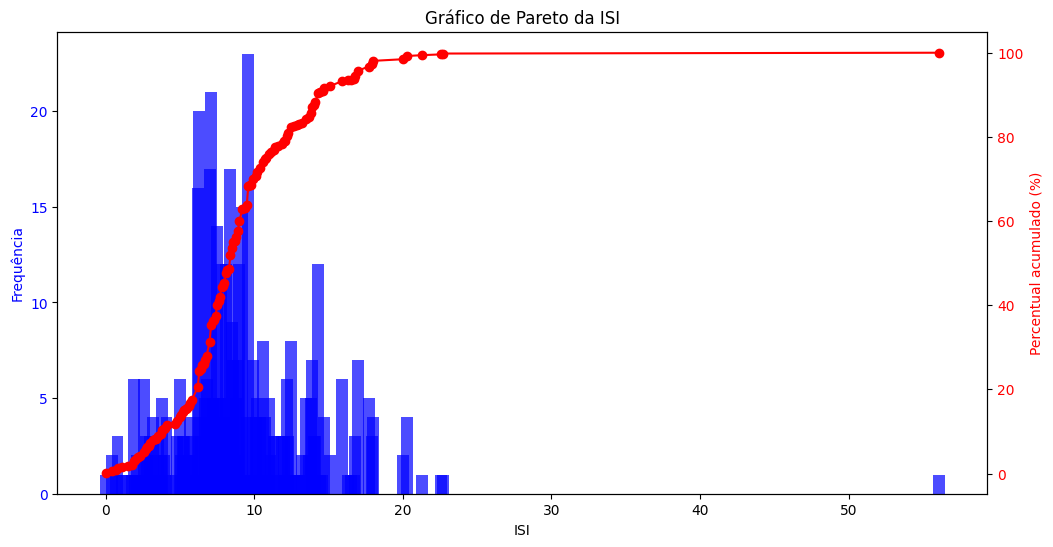

In [19]:
# ISI
import pandas as pd
import matplotlib.pyplot as plt

# Carrega a base de dados a partir do link
url = 'https://raw.githubusercontent.com/prof-jpontes/2024_Estatistica/main/Datasets/fires/forestfires.csv'
df = pd.read_csv(url)

# Visualiza as primeiras linhas e colunas para entender a estrutura
print(df.head())
print(df.columns)

# Conta a frequência dos valores em 'ISI'
isi_counts = df['ISI'].value_counts().sort_index()

# Calcula a frequência acumulada e percentual acumulado
isi_counts_cum = isi_counts.cumsum()
total_isi = isi_counts.sum()
isi_percentage_cum = isi_counts_cum / total_isi * 100

# Cria o gráfico de Pareto
fig, ax1 = plt.subplots(figsize=(12, 6))

# Barra para a frequência dos valores
ax1.bar(isi_counts.index, isi_counts, color='b', alpha=0.7)
ax1.set_xlabel('ISI')
ax1.set_ylabel('Frequência', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Linha para o percentual acumulado
ax2 = ax1.twinx()
ax2.plot(isi_percentage_cum.index, isi_percentage_cum, color='r', marker='o')
ax2.set_ylabel('Percentual acumulado (%)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Gráfico de Pareto da ISI')
plt.show()

# O gráfico de Pareto ISI mostra a distribuição do Índice de Severidade do Incêndio `ISI` e a porcentagem acumulada desses índices.

##Gráficos de Dispersão


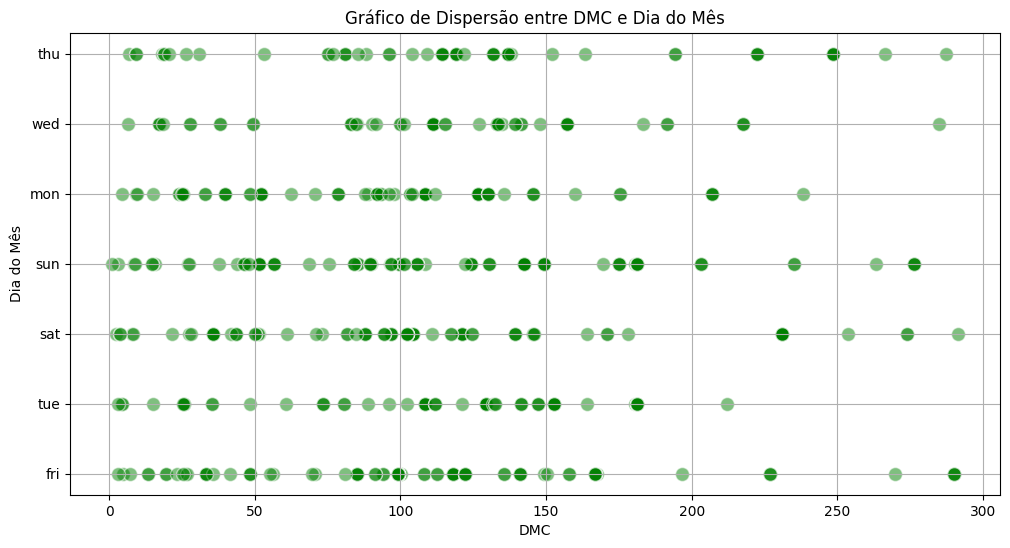

In [20]:
# DMC x Dia
import pandas as pd
import matplotlib.pyplot as plt

# Carrega a base de dados a partir do link
url = 'https://raw.githubusercontent.com/prof-jpontes/2024_Estatistica/main/Datasets/fires/forestfires.csv'
df = pd.read_csv(url)

# Cria o gráfico de dispersão
plt.figure(figsize=(12, 6))
plt.scatter(df['DMC'], df['day'], alpha=0.5, edgecolors='w', s=100, c='g')

# Adiciona títulos e rótulos
plt.title('Gráfico de Dispersão entre DMC e Dia do Mês')
plt.xlabel('DMC')
plt.ylabel('Dia do Mês')
plt.grid(True)
plt.show()

# O gráfico de dispersão entre `DMC` e `Dia` mostra como o índice de seca se relaciona com o dia da semana.
# Ele ajuda a ver se há algum padrão ou correlação entre esses dois fatores.

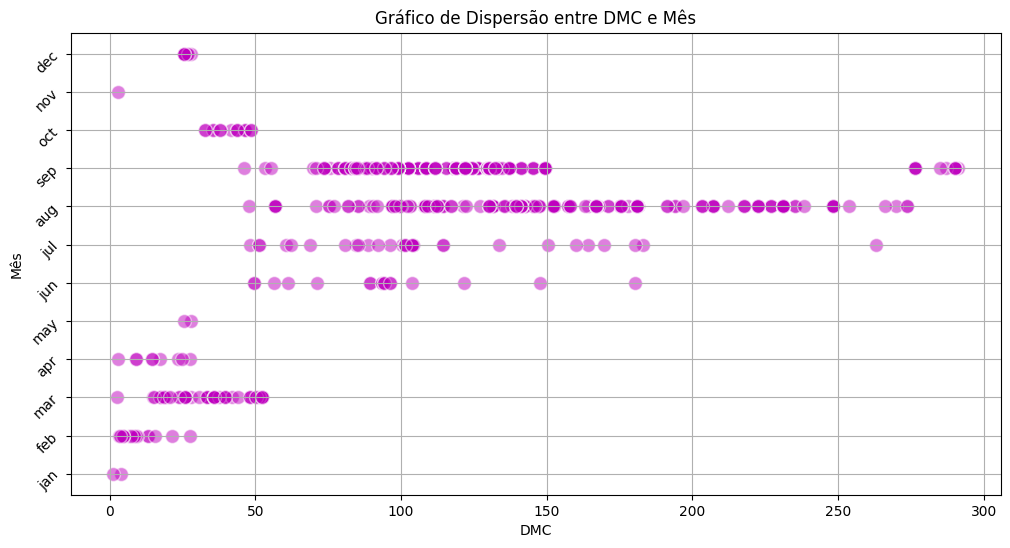

In [21]:
# DMC x Mês
import pandas as pd
import matplotlib.pyplot as plt

# Carrega a base de dados a partir do link
url = 'https://raw.githubusercontent.com/prof-jpontes/2024_Estatistica/main/Datasets/fires/forestfires.csv'
df = pd.read_csv(url)

# Mapeia os meses para números
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5,
    'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10,
    'nov': 11, 'dec': 12
}
df['month_num'] = df['month'].map(month_mapping)

# Cria o gráfico de dispersão
plt.figure(figsize=(12, 6))
plt.scatter(df['DMC'], df['month_num'], alpha=0.5, edgecolors='w', s=100, c='m')

# Adiciona títulos e rótulos
plt.title('Gráfico de Dispersão entre DMC e Mês')
plt.xlabel('DMC')
plt.ylabel('Mês')
plt.yticks(ticks=list(month_mapping.values()), labels=list(month_mapping.keys()), rotation=45)
plt.grid(True)
plt.show()

# O gráfico de dispersão entre `DMC` e `Mês` mostra como o índice de seca se relaciona com o mês.
# Ele ajuda a ver se há algum padrão ou correlação entre esses dois fatores.

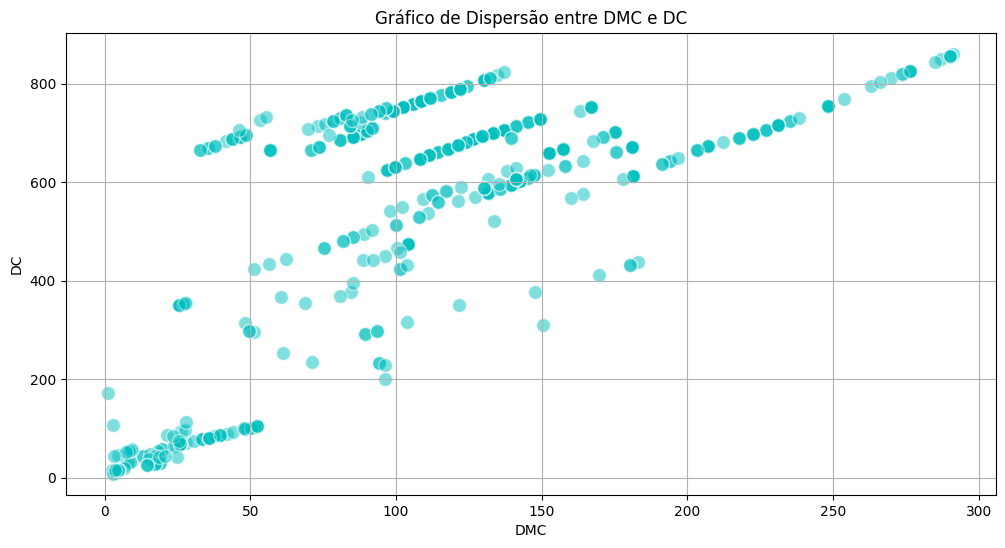

In [22]:
# DMC x DC
import pandas as pd
import matplotlib.pyplot as plt

# Carrega a base de dados a partir do link
url = 'https://raw.githubusercontent.com/prof-jpontes/2024_Estatistica/main/Datasets/fires/forestfires.csv'
df = pd.read_csv(url)

# Cria o gráfico de dispersão
plt.figure(figsize=(12, 6))
plt.scatter(df['DMC'], df['DC'], alpha=0.5, edgecolors='w', s=100, c='c')

# Adiciona títulos e rótulos
plt.title('Gráfico de Dispersão entre DMC e DC')
plt.xlabel('DMC')
plt.ylabel('DC')
plt.grid(True)
plt.show()

# O gráfico de dispersão entre `DMC` e `DC` mostra como o índice de seca se relaciona com o índice de umidade.
# Ele ajuda a ver se há uma conexão entre a seca e a umidade.

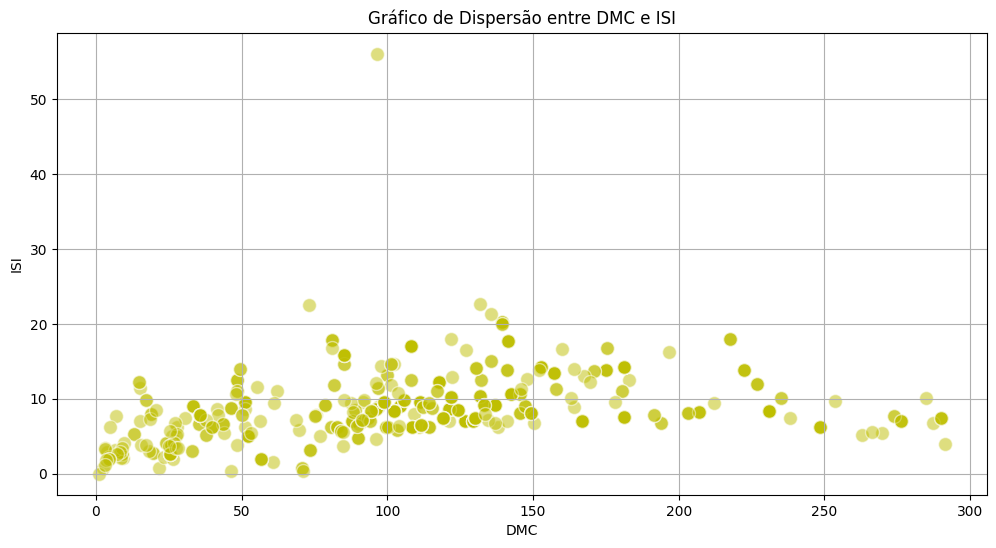

In [23]:
# DMC x ISI
import pandas as pd
import matplotlib.pyplot as plt

# Carrega a base de dados a partir do link
url = 'https://raw.githubusercontent.com/prof-jpontes/2024_Estatistica/main/Datasets/fires/forestfires.csv'
df = pd.read_csv(url)

# Cria o gráfico de dispersão
plt.figure(figsize=(12, 6))
plt.scatter(df['DMC'], df['ISI'], alpha=0.5, edgecolors='w', s=100, c='y')

# Adiciona títulos e rótulos
plt.title('Gráfico de Dispersão entre DMC e ISI')
plt.xlabel('DMC')
plt.ylabel('ISI')
plt.grid(True)
plt.show()

# O gráfico de dispersão entre `DMC` e `ISI` mostra como o índice de seca se relaciona com o Índice de Severidade do Incêndio.
# Ele ajuda a ver se há uma conexão entre a seca e a severidade do incêndio.

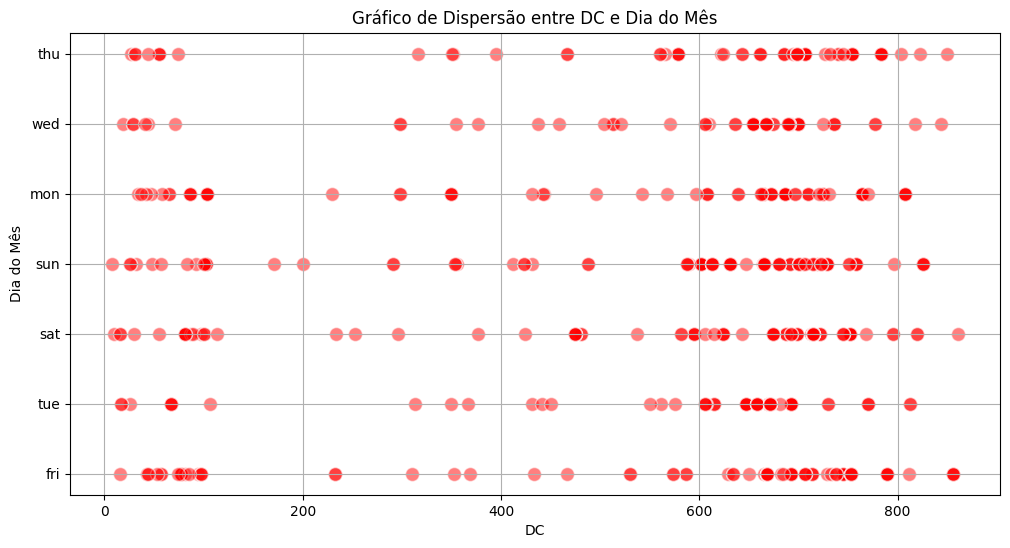

In [24]:
# DC x Dia
import pandas as pd
import matplotlib.pyplot as plt

# Carrega a base de dados a partir do link
url = 'https://raw.githubusercontent.com/prof-jpontes/2024_Estatistica/main/Datasets/fires/forestfires.csv'
df = pd.read_csv(url)

# Cria o gráfico de dispersão
plt.figure(figsize=(12, 6))
plt.scatter(df['DC'], df['day'], alpha=0.5, edgecolors='w', s=100, c='r')

# Adiciona títulos e rótulos
plt.title('Gráfico de Dispersão entre DC e Dia do Mês')
plt.xlabel('DC')
plt.ylabel('Dia do Mês')
plt.grid(True)
plt.show()

# O gráfico mostra como o índice de umidade `DC` se relaciona com o dia da semana.
# Ele ajuda a ver se há algum padrão ou correlação entre esses dois fatores.

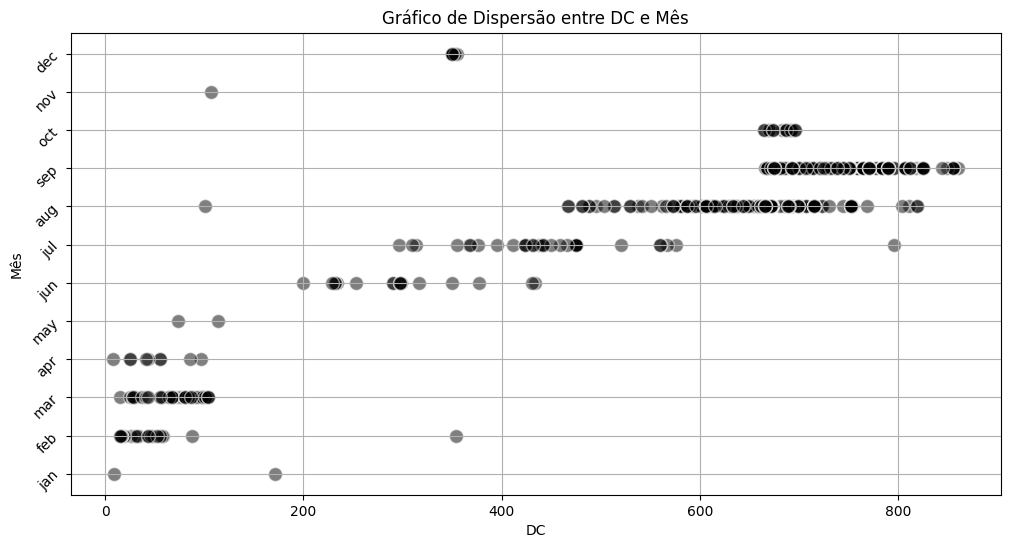

In [25]:
# DC x Mês
import pandas as pd
import matplotlib.pyplot as plt

# Carrega a base de dados a partir do link
url = 'https://raw.githubusercontent.com/prof-jpontes/2024_Estatistica/main/Datasets/fires/forestfires.csv'
df = pd.read_csv(url)

# Mapeia os meses para números
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5,
    'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10,
    'nov': 11, 'dec': 12
}
df['month_num'] = df['month'].map(month_mapping)

# Cria o gráfico de dispersão
plt.figure(figsize=(12, 6))
plt.scatter(df['DC'], df['month_num'], alpha=0.5, edgecolors='w', s=100, c='k')

# Adiciona títulos e rótulos
plt.title('Gráfico de Dispersão entre DC e Mês')
plt.xlabel('DC')
plt.ylabel('Mês')
plt.yticks(ticks=list(month_mapping.values()), labels=list(month_mapping.keys()), rotation=45)
plt.grid(True)
plt.show()

# O gráfico mostra como o índice de umidade `DC` se relaciona com o mês.
# Ele ajuda a ver se há algum padrão ou correlação entre esses dois fatores.

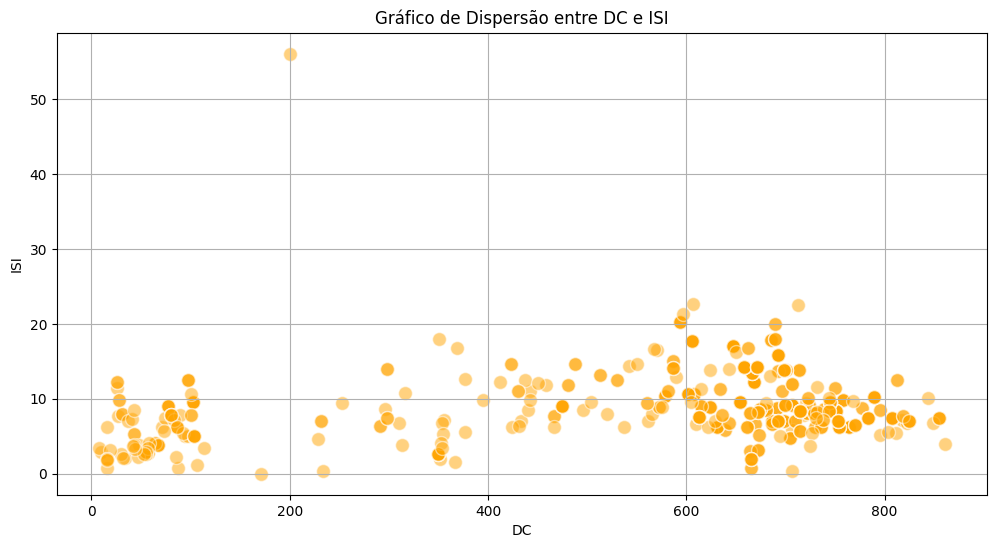

In [26]:
# DC x ISI
import pandas as pd
import matplotlib.pyplot as plt

# Carrega a base de dados a partir do link
url = 'https://raw.githubusercontent.com/prof-jpontes/2024_Estatistica/main/Datasets/fires/forestfires.csv'
df = pd.read_csv(url)

# Cria o gráfico de dispersão
plt.figure(figsize=(12, 6))
plt.scatter(df['DC'], df['ISI'], alpha=0.5, edgecolors='w', s=100, c='orange')

# Adiciona títulos e rótulos
plt.title('Gráfico de Dispersão entre DC e ISI')
plt.xlabel('DC')
plt.ylabel('ISI')
plt.grid(True)
plt.show()

# O gráfico mostra como o índice de umidade `DC` se relaciona com o Índice de Severidade do Incêndio.
# Ele ajuda a ver se há uma conexão entre a umidade e a severidade do incêndio.

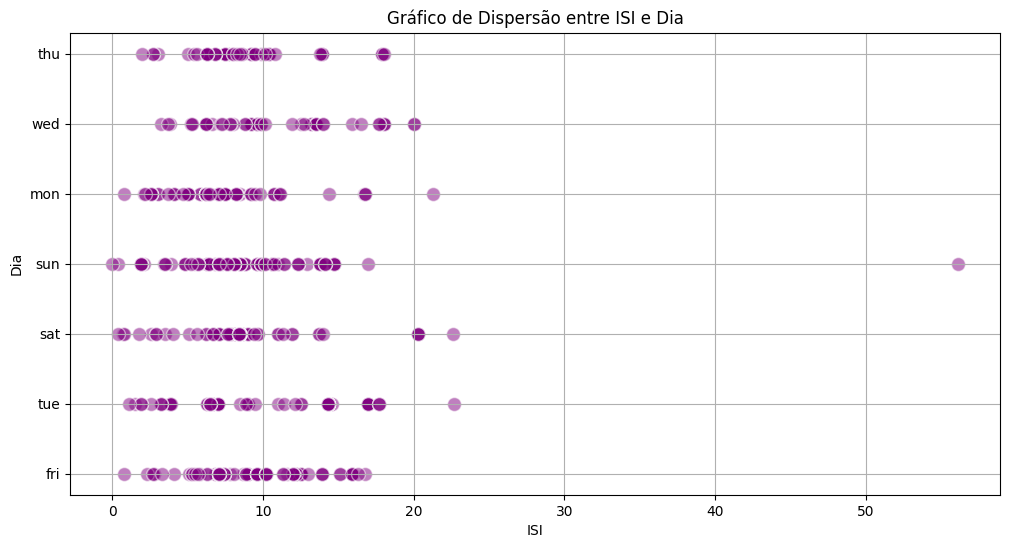

In [27]:
# ISI x Dia
import pandas as pd
import matplotlib.pyplot as plt

# Carrega a base de dados a partir do link
url = 'https://raw.githubusercontent.com/prof-jpontes/2024_Estatistica/main/Datasets/fires/forestfires.csv'
df = pd.read_csv(url)

# Cria o gráfico de dispersão
plt.figure(figsize=(12, 6))
plt.scatter(df['ISI'], df['day'], alpha=0.5, edgecolors='w', s=100, c='purple')

# Adiciona títulos e rótulos
plt.title('Gráfico de Dispersão entre ISI e Dia')
plt.xlabel('ISI')
plt.ylabel('Dia')
plt.grid(True)
plt.show()

# O gráfico mostra como o Índice de Severidade do Incêndio `ISI` se relaciona com o dia da semana.
# Ele ajuda a ver se há algum padrão ou correlação entre esses dois fatores.

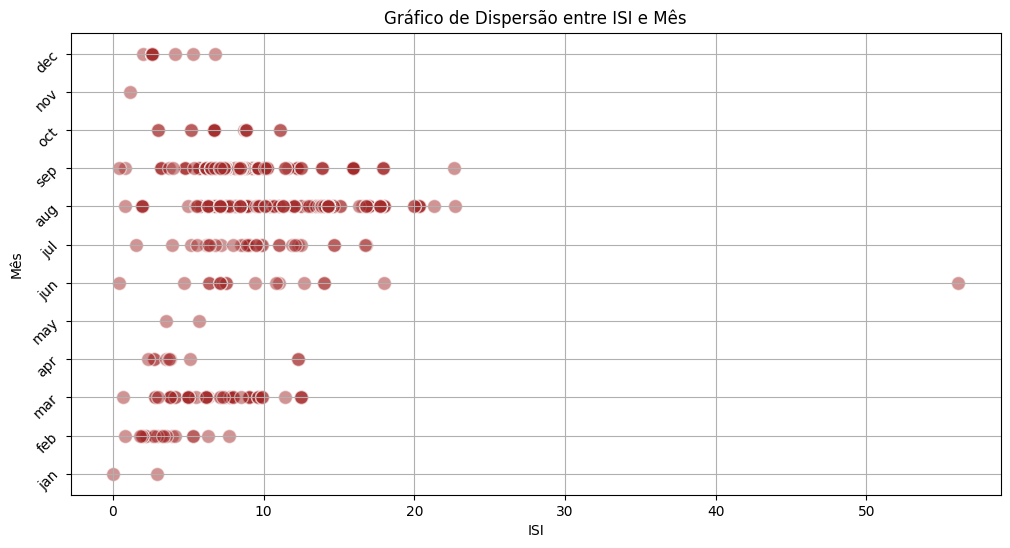

In [28]:
# ISI x Mês
import pandas as pd
import matplotlib.pyplot as plt

# Carrega a base de dados a partir do link
url = 'https://raw.githubusercontent.com/prof-jpontes/2024_Estatistica/main/Datasets/fires/forestfires.csv'
df = pd.read_csv(url)

# Mapeia os meses para números
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5,
    'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10,
    'nov': 11, 'dec': 12
}
df['month_num'] = df['month'].map(month_mapping)

# Cria o gráfico de dispersão
plt.figure(figsize=(12, 6))
plt.scatter(df['ISI'], df['month_num'], alpha=0.5, edgecolors='w', s=100, c='brown')

# Adiciona títulos e rótulos
plt.title('Gráfico de Dispersão entre ISI e Mês')
plt.xlabel('ISI')
plt.ylabel('Mês')
plt.yticks(ticks=list(month_mapping.values()), labels=list(month_mapping.keys()), rotation=45)
plt.grid(True)
plt.show()

# O gráfico mostra como o Índice de Severidade do Incêndio `ISI` se relaciona com o mês.
# Ele ajuda a ver se há algum padrão ou correlação entre esses dois fatores.

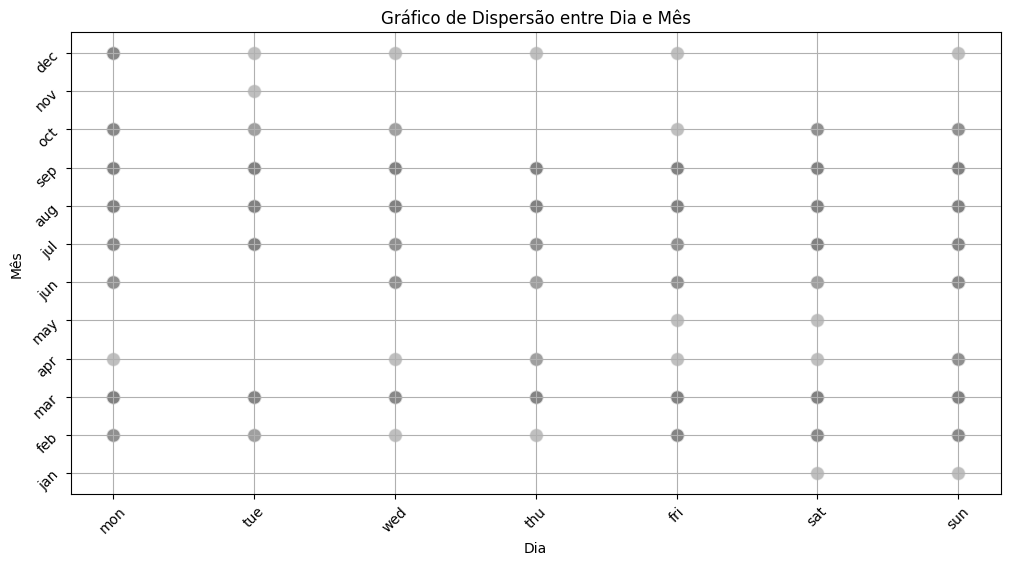

In [29]:
# Dia x Mês
import pandas as pd
import matplotlib.pyplot as plt

# Carrega a base de dados a partir do link
url = 'https://raw.githubusercontent.com/prof-jpontes/2024_Estatistica/main/Datasets/fires/forestfires.csv'
df = pd.read_csv(url)

# Mapeia os meses para números
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5,
    'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10,
    'nov': 11, 'dec': 12
}
df['month_num'] = df['month'].map(month_mapping)

# Mapeia os dias da semana para números
day_mapping = {
    'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5,
    'sat': 6, 'sun': 7
}
df['day_num'] = df['day'].map(day_mapping)

# Cria o gráfico de dispersão
plt.figure(figsize=(12, 6))
plt.scatter(df['day_num'], df['month_num'], alpha=0.5, edgecolors='w', s=100, c='grey')

# Adiciona títulos e rótulos
plt.title('Gráfico de Dispersão entre Dia e Mês')
plt.xlabel('Dia')
plt.ylabel('Mês')
plt.xticks(ticks=list(day_mapping.values()), labels=list(day_mapping.keys()), rotation=45)
plt.yticks(ticks=list(month_mapping.values()), labels=list(month_mapping.keys()), rotation=45)
plt.grid(True)
plt.show()

# O gráfico mostra como o dia da semana se relaciona com o mês.
# Ele ajuda a ver se há algum padrão ou correlação entre esses dois fatores.

# Exercício 3 - Medidas Resumo

**Especificação:** gere as medidas de tendência central (média, moda (quando for o caso), ponto médio e mediana), dispersão (amplitude, desvio padrão, variância, coeficiente de variação) e forma (assimetria e curtose), para cada um dos cinco atributos (Dia, Mês, DMC, DC e ISI).

---

**Entregável:** implemente um programa que calcule e imprima a tabela contendo todas as informações acima.

---

**Observação:** a impressão da tabela pode ser em uma única tabela ou em três tabelas separadas.

##Medidas Resumo - day

In [30]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

# Converte a coluna 'dia' em representação numérica
day_mapping = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7}
df['day_numeric'] = df['day'].map(day_mapping) # cria uma nova coluna com dados numéricos

# Usa a coluna numérica para cálculos
media_day = df['day_numeric'].mean()
moda_day = df['day_numeric'].mode()[0]
ponto_medio_day = (df['day_numeric'].max() + df['day_numeric'].min()) / 2
mediana_day = df['day_numeric'].median()

amplitude_day = df['day_numeric'].max() - df['day_numeric'].min()
desvio_padrao_day = df['day_numeric'].std()
variancia_day = df['day_numeric'].var()
coeficiente_variacao_day = (desvio_padrao_day / media_day) * 100

assimetria_day = skew(df['day_numeric'])
curtose_day = kurtosis(df['day_numeric'])

# Cria a tabela
tabela_day = pd.DataFrame({
    'Medida': ['Média', 'Moda', 'Ponto Médio', 'Mediana', 'Amplitude',
               'Desvio Padrão', 'Variância', 'Coeficiente de Variação',
               'Assimetria', 'Curtose'],
    'Valor': [media_day, moda_day, ponto_medio_day, mediana_day, amplitude_day,
              desvio_padrao_day, variancia_day, coeficiente_variacao_day,
              assimetria_day, curtose_day]
})

print(tabela_day)


                    Medida      Valor
0                    Média   4.259188
1                     Moda   7.000000
2              Ponto Médio   4.000000
3                  Mediana   5.000000
4                Amplitude   6.000000
5            Desvio Padrão   2.072929
6                Variância   4.297033
7  Coeficiente de Variação  48.669575
8               Assimetria  -0.212350
9                  Curtose  -1.284738


##Medidas Resumo - month


In [31]:
import pandas as pd

# Converte a coluna 'month' em representação numérica
month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
                 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
                 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
df['month_numeric'] = df['month'].map(month_mapping)

# Usa a coluna numérica para cálculos
media_month = df['month_numeric'].mean()

# Realiza algumas verificações
modes_month = df['month_numeric'].mode()
if len(modes_month) == 1:
  moda_month = modes_month[0]
else:
  moda_month = "Multiple modes"
ponto_medio_month = (df['month_numeric'].max() + df['month_numeric'].min()) / 2
mediana_month = df['month_numeric'].median()

amplitude_month = df['month_numeric'].max() - df['month_numeric'].min()
desvio_padrao_month = df['month_numeric'].std()
variancia_month = df['month_numeric'].var()
coeficiente_variacao_month = (desvio_padrao_month / media_month) * 100

assimetria_month = skew(df['month_numeric'])
curtose_month = kurtosis(df['month_numeric'])

# Cria a tabela
tabela_month = pd.DataFrame({
    'Medida': ['Média', 'Moda', 'Ponto Médio', 'Mediana', 'Amplitude',
               'Desvio Padrão', 'Variância', 'Coeficiente de Variação',
               'Assimetria', 'Curtose'],
    'Valor': [media_month, moda_month, ponto_medio_month, mediana_month, amplitude_month,
              desvio_padrao_month, variancia_month, coeficiente_variacao_month,
              assimetria_month, curtose_month]
})

print(tabela_month)

                    Medida      Valor
0                    Média   7.475822
1                     Moda   8.000000
2              Ponto Médio   6.500000
3                  Mediana   8.000000
4                Amplitude  11.000000
5            Desvio Padrão   2.275990
6                Variância   5.180131
7  Coeficiente de Variação  30.444681
8               Assimetria  -1.214476
9                  Curtose   0.626564


##Medidas Resumo - DMC


In [32]:
import pandas as pd
import numpy as np
from scipy import stats

# Carregando o dataset
url = 'https://raw.githubusercontent.com/prof-jpontes/2024_Estatistica/main/Datasets/fires/forestfires.csv'
df = pd.read_csv(url)

# Calculando medidas de tendência central
dmc = df['DMC']

# Média
media = dmc.mean()

# Moda
moda = dmc.mode()[0]

# Mediana
mediana = dmc.median()

# Ponto Médio
# Como a variável é contínua, o ponto médio é a média dos valores mínimo e máximo
ponto_medio = (dmc.min() + dmc.max()) / 2

# Calculando medidas de dispersão
# Amplitude
amplitude = dmc.max() - dmc.min()

# Variância
variancia = dmc.var()

# Desvio Padrão
desvio_padrao = dmc.std()

# Coeficiente de Variação
coeficiente_variacao = (desvio_padrao / media) * 100

# Calculando medidas de forma
# Assimetria
assimetria = dmc.skew()

# Curtose
curtose = dmc.kurtosis()

# Exibindo os resultados
print("Medidas de Tendência Central:")
print(f"Média: {media:.2f}")
print(f"Moda: {moda:.2f}")
print(f"Mediana: {mediana:.2f}")
print(f"Ponto Médio: {ponto_medio:.2f}")

print("\nMedidas de Dispersão:")
print(f"Amplitude: {amplitude:.2f}")
print(f"Variância: {variancia:.2f}")
print(f"Desvio Padrão: {desvio_padrao:.2f}")
print(f"Coeficiente de Variação: {coeficiente_variacao:.2f}%")

print("\nMedidas de Forma:")
print(f"Assimetria: {assimetria:.2f}")
print(f"Curtose: {curtose:.2f}")


Medidas de Tendência Central:
Média: 110.87
Moda: 99.00
Mediana: 108.30
Ponto Médio: 146.20

Medidas de Dispersão:
Amplitude: 290.20
Variância: 4101.95
Desvio Padrão: 64.05
Coeficiente de Variação: 57.77%

Medidas de Forma:
Assimetria: 0.55
Curtose: 0.20


##Medidas Resumo - DC


In [33]:
import pandas as pd
import numpy as np
from scipy import stats

# Carregando o dataset
url = 'https://raw.githubusercontent.com/prof-jpontes/2024_Estatistica/main/Datasets/fires/forestfires.csv'
df = pd.read_csv(url)

# Calculando medidas para a variável DC
dc = df['DC']

# Medidas de Tendência Central
media_dc = dc.mean()
moda_dc = dc.mode()[0]
mediana_dc = dc.median()
ponto_medio_dc = (dc.min() + dc.max()) / 2

# Medidas de Dispersão
amplitude_dc = dc.max() - dc.min()
variancia_dc = dc.var()
desvio_padrao_dc = dc.std()
coeficiente_variacao_dc = (desvio_padrao_dc / media_dc) * 100

# Medidas de Forma
assimetria_dc = dc.skew()
curtose_dc = dc.kurtosis()

# Exibindo os resultados
print("Medidas de Tendência Central para DC:")
print(f"Média: {media_dc:.2f}")
print(f"Moda: {moda_dc:.2f}")
print(f"Mediana: {mediana_dc:.2f}")
print(f"Ponto Médio: {ponto_medio_dc:.2f}")

print("\nMedidas de Dispersão para DC:")
print(f"Amplitude: {amplitude_dc:.2f}")
print(f"Variância: {variancia_dc:.2f}")
print(f"Desvio Padrão: {desvio_padrao_dc:.2f}")
print(f"Coeficiente de Variação: {coeficiente_variacao_dc:.2f}%")

print("\nMedidas de Forma para DC:")
print(f"Assimetria: {assimetria_dc:.2f}")
print(f"Curtose: {curtose_dc:.2f}")


Medidas de Tendência Central para DC:
Média: 547.94
Moda: 745.30
Mediana: 664.20
Ponto Médio: 434.25

Medidas de Dispersão para DC:
Amplitude: 852.70
Variância: 61536.84
Desvio Padrão: 248.07
Coeficiente de Variação: 45.27%

Medidas de Forma para DC:
Assimetria: -1.10
Curtose: -0.25


##Medidas Resumo - ISI


In [34]:
import pandas as pd
import numpy as np
from scipy import stats

# Carregando o dataset
url = 'https://raw.githubusercontent.com/prof-jpontes/2024_Estatistica/main/Datasets/fires/forestfires.csv'
df = pd.read_csv(url)

# Calculando medidas para a variável ISI
isi = df['ISI']

# Medidas de Tendência Central
media_isi = isi.mean()
moda_isi = isi.mode()[0]
mediana_isi = isi.median()
ponto_medio_isi = (isi.min() + isi.max()) / 2

# Medidas de Dispersão
amplitude_isi = isi.max() - isi.min()
variancia_isi = isi.var()
desvio_padrao_isi = isi.std()
coeficiente_variacao_isi = (desvio_padrao_isi / media_isi) * 100

# Medidas de Forma
assimetria_isi = isi.skew()
curtose_isi = isi.kurtosis()

# Exibindo os resultados
print("Medidas de Tendência Central para ISI:")
print(f"Média: {media_isi:.2f}")
print(f"Moda: {moda_isi:.2f}")
print(f"Mediana: {mediana_isi:.2f}")
print(f"Ponto Médio: {ponto_medio_isi:.2f}")

print("\nMedidas de Dispersão para ISI:")
print(f"Amplitude: {amplitude_isi:.2f}")
print(f"Variância: {variancia_isi:.2f}")
print(f"Desvio Padrão: {desvio_padrao_isi:.2f}")
print(f"Coeficiente de Variação: {coeficiente_variacao_isi:.2f}%")

print("\nMedidas de Forma para ISI:")
print(f"Assimetria: {assimetria_isi:.2f}")
print(f"Curtose: {curtose_isi:.2f}")


Medidas de Tendência Central para ISI:
Média: 9.02
Moda: 9.60
Mediana: 8.40
Ponto Médio: 28.05

Medidas de Dispersão para ISI:
Amplitude: 56.10
Variância: 20.79
Desvio Padrão: 4.56
Coeficiente de Variação: 50.54%

Medidas de Forma para ISI:
Assimetria: 2.54
Curtose: 21.46


# Exercício 4 - Diagrama de Caixa (box plot)

**Especificação:** imprima os diagramas de caixa (box plot) de cada um dos cinco atributos (Dia, Mês, DMC, DC e ISI).

---

**Entregável:** implemente um programa que calcule e imprima os diagramas de caixa (box plot) de cada um dos cinco atributos (Dia, Mês, DMC, DC e ISI).

Comente sobre a Variabilidade de cada um dos atributos.

---

**Observação:** Os comentários sobre a variabilidade de cada atributo devem ser enviados em um arquivo PDF à parte.

##Box Plot - day


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
# Converte a coluna 'dia' em representação numérica
day_mapping = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7}
df['day_numeric'] = df['day'].map(day_mapping) # cria uma nova coluna com dados numéricos

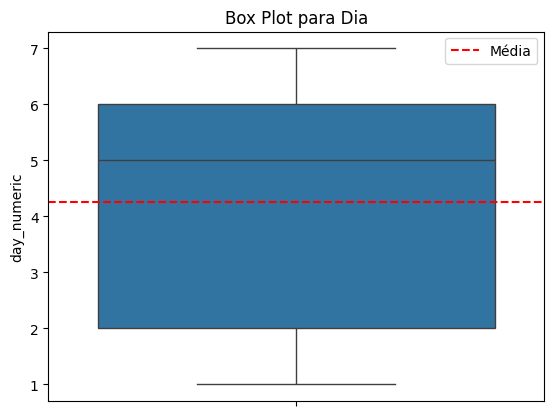

In [37]:
plt.figure()
sns.boxplot(df['day_numeric'])
plt.axhline(df['day_numeric'].mean(), label = 'Média', color='red', linestyle='--')
plt.legend()
plt.title('Box Plot para Dia')
plt.show()

# O box plot para o dia mostra como os valores estão distribuídos ao longo da semana.
# A variabilidade é representada pelo comprimento da caixa e das "mãos" do gráfico,
# indicando a diferença entre os dias com menor e maior frequência de incêndios.

##Box Plot - month


In [38]:
# Converte a coluna 'month' em representação numérica
month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
                 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
                 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
df['month_numeric'] = df['month'].map(month_mapping)

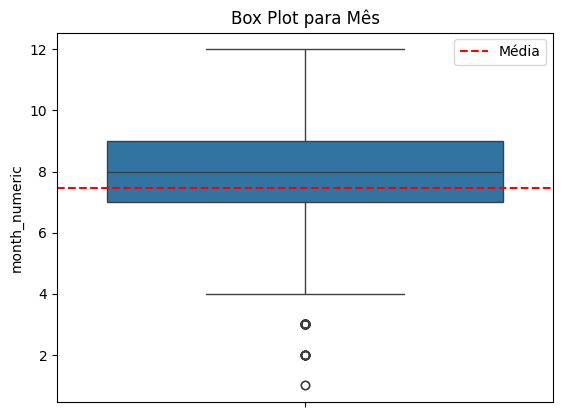

In [39]:
plt.figure()
sns.boxplot(df['month_numeric'])
plt.axhline(df['month_numeric'].mean(), label = 'Média', color='red', linestyle='--')
plt.legend()
plt.title('Box Plot para Mês')
plt.show()

# O box plot para o mês mostra como os valores estão distribuídos ao longo do ano.
# A variabilidade é representada pelo comprimento da caixa e das "mãos" do gráfico,
# indicando a diferença entre os meses com menor e maior frequência de incêndios.

##Box Plot - DMC



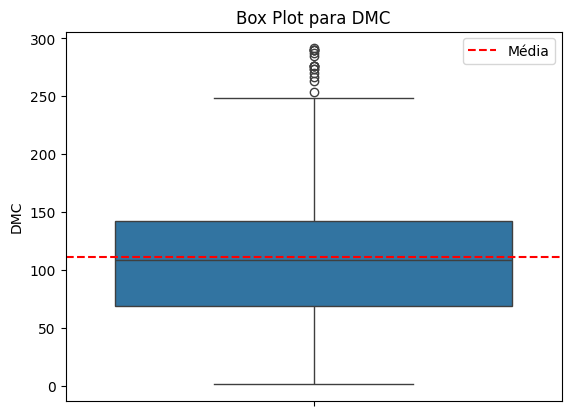

In [40]:
plt.figure()
sns.boxplot(df['DMC'])
plt.axhline(df['DMC'].mean(), label = 'Média', color='red', linestyle='--')
plt.legend()
plt.title('Box Plot para DMC')
plt.show()

# O box plot para o índice de seca mostra como os valores estão distribuídos ao longo do ano.
# A variabilidade é representada pelo comprimento da caixa e das "mãos" do gráfico,
# indicando a diferença entre os meses com menor e maior frequência de incêndios.

##Box Plot - DC



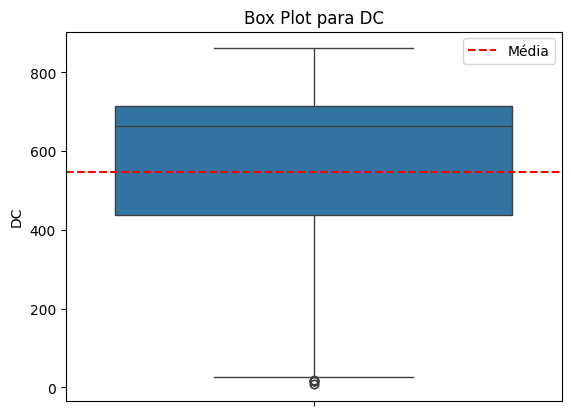

In [41]:
plt.figure()
sns.boxplot(df['DC'])
plt.axhline(df['DC'].mean(), label = 'Média', color='red', linestyle='--')
plt.legend()
plt.title('Box Plot para DC')
plt.show()

# O box plot para o índice de umidade mostra como os valores estão distribuídos ao longo do ano.
# A caixa mostra a faixa onde estão os 50% centrais dos dados, enquanto as "mãos" mostram a variação geral.
# Pontos fora das "mãos" são valores atípicos, indicando umidade extrema ou anomalias.

##Box Plot - ISI



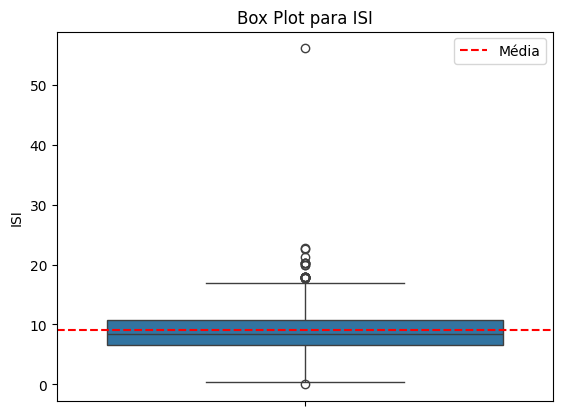

In [42]:
plt.figure()
sns.boxplot(df['ISI'])
plt.axhline(df['ISI'].mean(), label = 'Média', color='red', linestyle='--')
plt.legend()
plt.title('Box Plot para ISI')
plt.show()

# O box plot para o Índice de Severidade do Incêndio.
# A caixa representa a faixa central onde a maioria dos valores está concentrada,
# enquanto as "mãos" indicam a variação geral.
# Valores fora dessas mãos são considerados atípicos, indicando possíveis eventos extremos.

# Exercício 5 - Medidas de Associação

**Especificação:** imprima os gráficos de dispersão entre os atributos Dia e Mês, DMC e DC, DMC e ISI, e DC e ISI.

---

**Entregável:** implemente um programa que calcule e imprima os quatro gráficos de dispersão definidos acima.

Baseado nos gráficos de dispersão, comente sobre a
associatividade entre cada um dos quatro pares de atributos (correlação positiva, correlação negativa, sem correlação, etc).

---

**Observação:** Os comentários sobre a associatividade entre os quatro pares de atributos devem ser enviados em um arquivo PDF à parte.

##Gráficos de dispersão entre os atributos - Dia e Mês


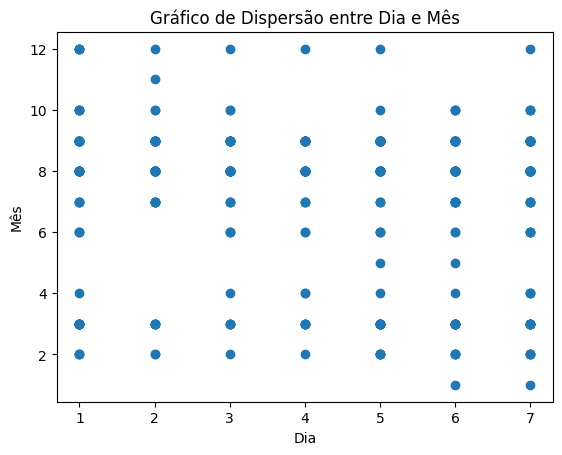

In [43]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(df['day_numeric'], df['month_numeric'])
plt.xlabel('Dia')
plt.ylabel('Mês')
plt.title('Gráfico de Dispersão entre Dia e Mês')
plt.show()

# Não parece haver uma correlação clara entre o dia da semana e o mês em que ocorrem os incêndios.
# Os pontos estão espalhados aleatoriamente pelo gráfico, sem um padrão discernível.

##Gráficos de dispersão entre os atributos - DMC e DC


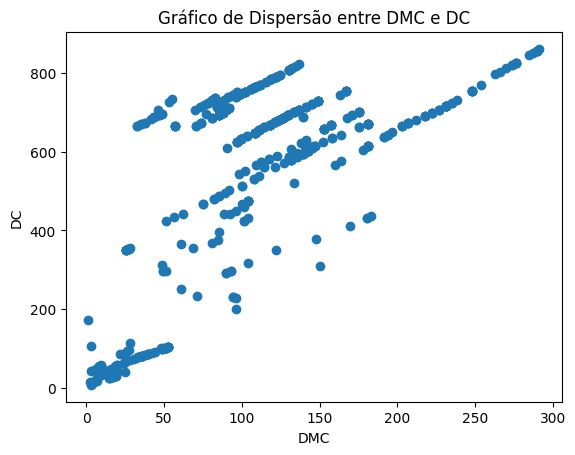

In [44]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(df['DMC'], df['DC'])
plt.xlabel('DMC')
plt.ylabel('DC')
plt.title('Gráfico de Dispersão entre DMC e DC')
plt.show()

# O gráfico de dispersão entre DMC e DC sugere uma correlação negativa,
# embora não seja perfeitamente linear. Isso indica que, à medida que o índice de
# seca (DMC) aumenta, o índice de umidade do combustível (DC) tende a diminuir,
# o que é intuitivo, já que condições mais secas geralmente levam a menor umidade
# nos combustíveis. No entanto, a dispersão dos pontos indica que outros fatores
# também podem influenciar a relação entre DMC e DC.

##Gráficos de dispersão entre os atributos - DMC e ISI

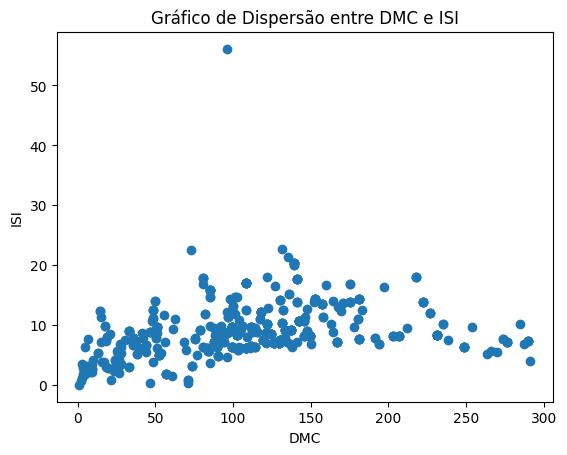

In [45]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(df['DMC'], df['ISI'])
plt.xlabel('DMC')
plt.ylabel('ISI')
plt.title('Gráfico de Dispersão entre DMC e ISI')
plt.show()

# O gráfico de dispersão entre DMC e ISI sugere uma correlação positiva moderada.
# Isso indica que, à medida que o índice de seca (DMC) aumenta, o Índice de Severidade do
# Incêndio (ISI) também tende a aumentar. Essa relação faz sentido, pois condições mais
# secas facilitam a propagação e a intensificação dos incêndios. No entanto, a dispersão
# dos pontos indica que outros fatores além do DMC também contribuem para a severidade
# do incêndio.

##Gráficos de dispersão entre os atributos - DC e ISI

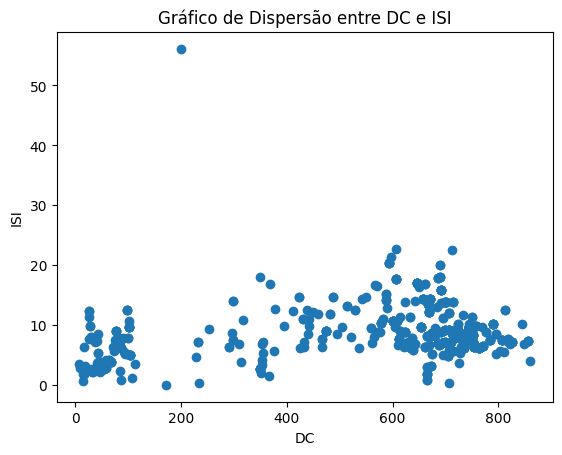

In [46]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(df['DC'], df['ISI'])
plt.xlabel('DC')
plt.ylabel('ISI')
plt.title('Gráfico de Dispersão entre DC e ISI')
plt.show()

# O gráfico de dispersão entre DC e ISI sugere uma correlação negativa,
# embora com uma dispersão considerável dos pontos. Isso indica que,
# em geral, à medida que o índice de umidade do combustível (DC) aumenta,
# o Índice de Severidade do Incêndio (ISI) tende a diminuir.
# Essa relação é esperada, pois combustíveis mais úmidos são mais
# difíceis de inflamar e sustentar a queima. A dispersão dos pontos
# sugere que outros fatores além do DC também influenciam o ISI.